# Habitability Score of House Predictions
***(Part 1 - Exploratory Data Analysis)***

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the dataset into pandas DataFrame using `read_csv` method.
data = pd.read_csv("data.csv")

# view
data.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [3]:
# Shape
nrows, ncolumns = data.shape

In [4]:
# Metadata information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             39499 non-null  object 
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       37845 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  38116 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitability_score      39499 non-null

In [5]:
# Summary statistics
data.describe() # prints only numerical stats

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
count,39499.000000,37845.000000,39499.000000,38116.000000,39499.000000,39499.000000,39499.000000,39499.000000
mean,1391.715638,3.923768,2.331375,0.484678,6.354772,121.352566,3.735945,73.482297
std,1953.287544,2.690992,1.179964,0.752207,1.219681,62.384669,0.796843,14.118753
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.280000
25%,494.000000,2.000000,1.000000,0.000000,5.600000,95.000000,3.220000,69.660000
50%,932.000000,4.000000,2.000000,0.000000,6.470000,113.000000,3.850000,75.760000
75%,1770.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.260000,82.260000
max,28064.000000,15.000000,6.000000,3.000000,9.910000,1044.000000,5.000000,100.000000


In [6]:
# For categorical stats
data.describe(include='object')

,Property_ID,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
count,39499,39499,38457,39499,39499,38712,38280
unique,39499,6,3,3,5,4,3
top,0x21e3,Apartment,Semi_Furnished,No,All time,Well below average,Medium
freq,1,14596,20357,29714,19511,19472,32996


In [7]:
# Prints the column names
data.columns.tolist()

['Property_ID',
 'Property_Type',
 'Property_Area',
 'Number_of_Windows',
 'Number_of_Doors',
 'Furnishing',
 'Frequency_of_Powercuts',
 'Power_Backup',
 'Water_Supply',
 'Traffic_Density_Score',
 'Crime_Rate',
 'Dust_and_Noise',
 'Air_Quality_Index',
 'Neighborhood_Review',
 'Habitability_score']

In [8]:
# Renames the column names
data.rename(columns = {col: col.lower() for col in data.columns.tolist()},
           inplace=True)

In [9]:
# Examine the unique values in categorical variables.
cat_variables = data.select_dtypes(include='object').columns.tolist()[1:]

for col in cat_variables:
    print(col + ":" , data[col].unique().tolist())
    print("--" * 10)

property_type: ['Apartment', 'Bungalow', 'Single-family home', 'Duplex', '#R%$G&867', 'Container Home']
--------------------
furnishing: ['Semi_Furnished', 'Unfurnished', 'Fully Furnished', nan]
--------------------
power_backup: ['No', 'Yes', 'NOT MENTIONED']
--------------------
water_supply: ['Once in a day - Morning', 'Once in a day - Evening', 'All time', 'NOT MENTIONED', 'Once in two days']
--------------------
crime_rate: ['Slightly below average', 'Well below average', 'Well above average', nan, 'Slightly above average']
--------------------
dust_and_noise: ['Medium', nan, 'High', 'Low']
--------------------


In [10]:
# Let's replace 'NOT MENTIONED' & '#R%$G&867' values from dataset with 'NaN'.
data.replace(['NOT MENTIONED', '#R%$G&867'], np.nan, 
             inplace=True)

In [11]:
# Missing values
nan_columns = data.columns[data.isnull().sum() > 0].tolist()
n_missing = data[nan_columns].isnull().sum()
percent_missing = round(n_missing / nrows * 100, 2)

pd.concat([n_missing, percent_missing], axis=1, keys=['n_missing', '%_missing'])

,n_missing,%_missing
property_type,510,1.29
number_of_windows,1654,4.19
furnishing,1042,2.64
frequency_of_powercuts,1383,3.50
power_backup,828,2.10
water_supply,345,0.87
crime_rate,787,1.99
dust_and_noise,1219,3.09


In [12]:
# Split the data into training and test datasets into ratio of 70:30.
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.3, random_state=42)
print("Training Data:", df_train.shape)
print("Test Data:", df_test.shape)

Training Data: (27649, 15)
Test Data: (11850, 15)


# Exploratory Data Analysis

#### Univariate Analysis
Univarite analysis or `Descriptive analysis` provides an understanding of a characteristics of
each attributes of datasets.
Let's observe the distribution of attributes.


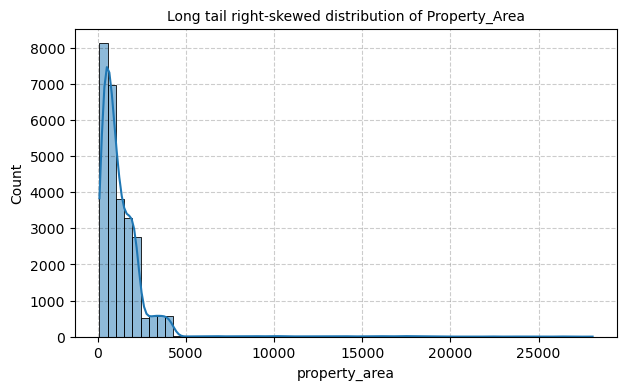

In [13]:
# Plot the histograms of numerical variables to observe the distribution of data.
# Property_Area
plt.figure(figsize=(7, 4))
sns.histplot(data=df_train, x='property_area', kde=True, bins=60)
plt.grid(ls='--', c='#000', alpha=0.2)
plt.title("Long tail right-skewed distribution of Property_Area", size=10)
plt.show()

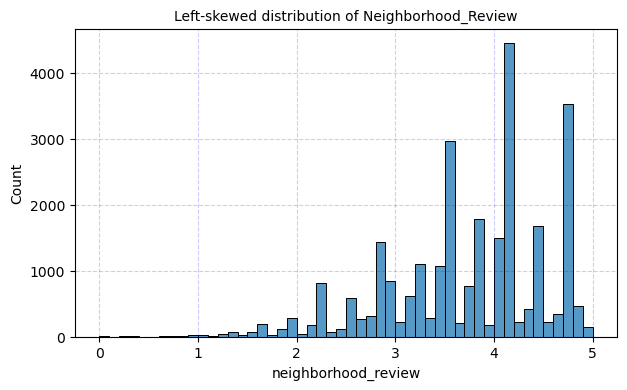

In [14]:
# Neighborhood_review
plt.figure(figsize=(7, 4))
sns.histplot(data=df_train, x='neighborhood_review', bins=50)

plt.title("Left-skewed distribution of Neighborhood_Review", size=10)
plt.grid(ls="--", c='b', alpha=0.2)
plt.show()

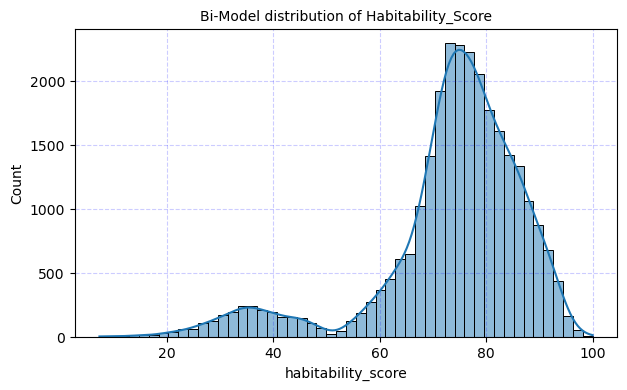

In [15]:
# Habitability_Score
plt.figure(figsize=(7, 4))
sns.histplot(data=df_train, x='habitability_score', kde=True, bins=50)
plt.title("Bi-Model distribution of Habitability_Score", size=10)
plt.grid(ls="--", c='b', alpha=0.2)
plt.show()

We can that the distribution of target variables(Habitability Score) has two models which means that it has two
centers; This might be result of two groups present in the data. We should make distribution
normal before using it in model training.

In [16]:
# Let's examine the house with habitability_score greater than and less than 50.
(df_train['habitability_score'] > 50).astype('int').value_counts()

1    25331
0     2318
Name: habitability_score, dtype: int64

In [17]:
# Examine the distribution of numerical variables on these two groups of habitability score.
num_variables = ['property_area', 'traffic_density_score', 'air_quality_index', 'neighborhood_review']

low_score = df_train[df_train['habitability_score'] <= 50][num_variables]
high_score = df_train[df_train['habitability_score'] > 50][num_variables]

In [18]:
# Descriptive statistics
low_score_desc = round(low_score.describe(), 2)
high_score_desc = round(high_score.describe(), 2)

pd.concat([low_score_desc, high_score_desc], axis=1, keys=['score<50', 'score>50'])

score<50                                          \
      property_area traffic_density_score air_quality_index   
count       2318.00               2318.00           2318.00   
mean        1092.01                  6.63            128.02   
std         1903.28                  1.23             59.27   
min          102.00                  1.82              1.00   
25%          389.25                  5.81             98.00   
50%          693.00                  6.68            120.00   
75%         1262.50                  7.52            150.00   
max        28064.00                  9.49            931.00   

                               score>50                        \
      neighborhood_review property_area traffic_density_score   
count             2318.00      25331.00              25331.00   
mean                 2.51       1421.70                  6.33   
std                  0.68       1990.86                  1.22   
min                  0.00        100.00                  0.00   
25%                  2.10        508.00                  5.58   
50%                  2.58        950.00                  6.45   
75%                  2.93       1803.00                  7.20   
max                  4.04      28057.00                  9.91   

                                             
      air_quality_index neighborhood_review  
count          25331.00            25331.00  
mean             120.63                3.85  
std               61.23                0.71  
min                0.00                0.67  
25%               95.00                3.48  
50%              113.00                4.06  
75%              139.00                4.40  
max             1043.00                5.00

In [19]:
df_train['score'] = df_train['habitability_score'].apply(lambda x: '>50' if x > 50 else '<50')

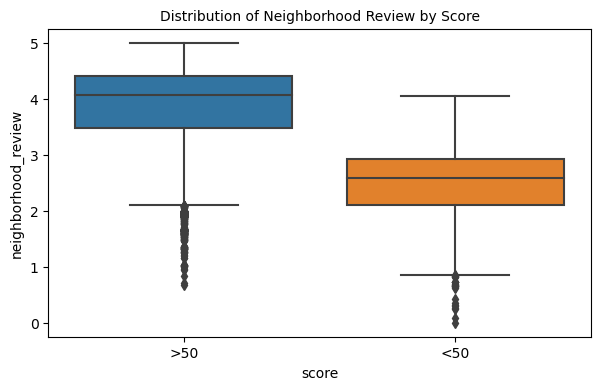

In [20]:
# plot boxplot
plt.figure(figsize=(7, 4))

sns.boxplot(data=df_train, x='score', y='neighborhood_review')
plt.title("Distribution of Neighborhood Review by Score", size=10)
plt.show()

We can clearly see from the above boxplot that there are two groups in our response variable with different mean values. So, we need to transform bi-model distribution into normal distribuition, for that we can use log transformation.

In [21]:
# delete the score column
del df_train['score']

#### Bi-variate Analysis
`Correlation analysis` or bivariate analysis helps to identified the relation between two variables; independent & dependent variables.Y

In [22]:
# Correlation
df_train.corr(numeric_only=True)['habitability_score']

TypeError: corr() got an unexpected keyword argument 'numeric_only'

Let's examine the relation between `frequency_of_powercuts` and `neighborhood_review` with target variable `habitability_score`.

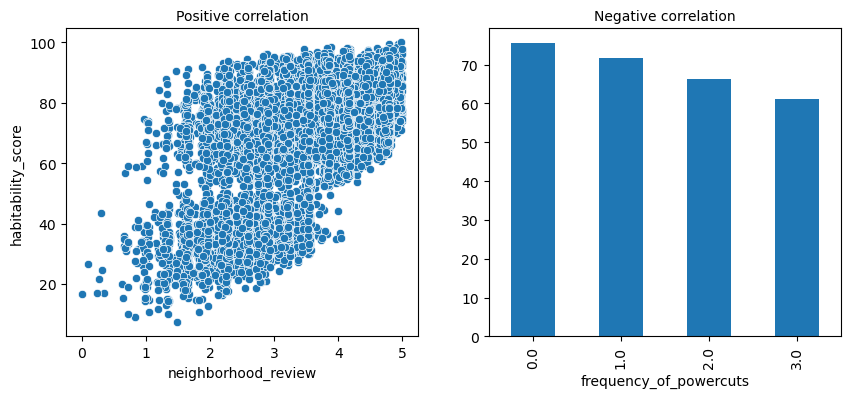

In [23]:
# Data preparation
freq_grp_data = df_train.groupby(by=['frequency_of_powercuts'])['habitability_score'].mean()

# plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(data=df_train, x='neighborhood_review', y='habitability_score', ax=ax1)
ax1.set_title("Positive correlation", size=10)

freq_grp_data.plot(kind='bar', ax=ax2)
ax2.set_title("Negative correlation", size=10)

plt.show()

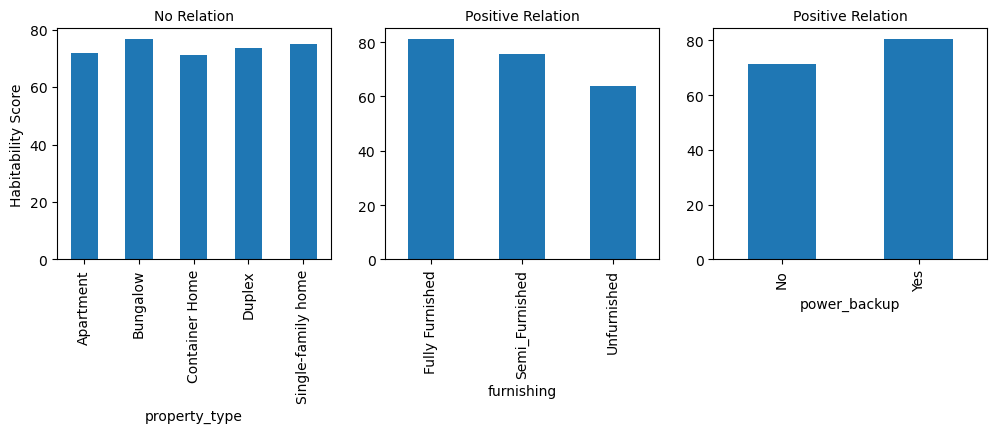

In [24]:
# Let's examine the relation between target variable & categorical variables using barplots.
# Subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

df_train.groupby(by=['property_type'])['habitability_score'].mean().plot(kind='bar', ax=ax1)
ax1.set_ylabel("Habitability Score")
ax1.set_title("No Relation", size=10)

df_train.groupby(by=['furnishing'])['habitability_score'].mean().plot(kind='bar', ax=ax2)
ax2.set_title("Positive Relation", size=10)

df_train.groupby(by=['power_backup'])['habitability_score'].mean().plot(kind='bar', ax=ax3)
ax3.set_title("Positive Relation", size=10);

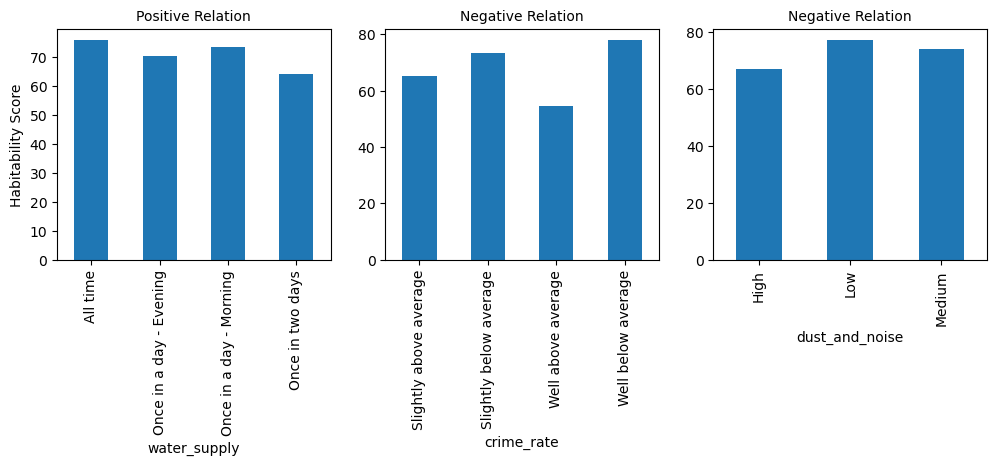

In [25]:
# Subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

df_train.groupby(by=['water_supply'])['habitability_score'].mean().plot(kind='bar', ax=ax1)
ax1.set_ylabel("Habitability Score")
ax1.set_title("Positive Relation", size=10)

df_train.groupby(by=['crime_rate'])['habitability_score'].mean().plot(kind='bar', ax=ax2)
ax2.set_title("Negative Relation", size=10)

df_train.groupby(by=['dust_and_noise'])['habitability_score'].mean().plot(kind='bar', ax=ax3)
ax3.set_title("Negative Relation", size=10)
plt.show()

# Data prepration for Machine Learning Algorithms
Its time to prepare the data for your Machine Learning algorithms. First, let's separate the predictors and the labels since we don't necessarily want to apply the same transformations to the predictors and the
target value


In [26]:
# Split the features and label variables.
X = df_train.drop(['habitability_score'], axis=1)
y = df_train['habitability_score'].copy()

X_test = df_test.drop(['habitability_score'], axis=1)
y_test = df_test['habitability_score'].copy()

### Data Cleaning

Let's remove the outliers from the dataset using Interquantile Range values.

In [27]:
# Remove outliers from numerical features.
def remove_outliers(col):
    # find quantiles
    Q1 = np.quantile(X[col], q=0.25)
    Q3 = np.quantile(X[col], q=0.75)
    
    # Inter quantile Range 
    IQR = Q3 - Q1
    
    # Upper range & lower range
    upper_range = Q3 + (IQR * 1.5)
    lower_range = Q1 - (IQR * 1.5)
    # Replace the outlier values with upper and lower range value.
    X[col] = np.where(X[col] > upper_range, upper_range, X[col])
    X[col] = np.where(X[col] < lower_range, lower_range, X[col])

In [28]:
for col in num_variables:
    remove_outliers(col)

In [29]:
# Features
num_features = ['property_area', 'number_of_windows', 'number_of_doors', 
                'traffic_density_score', 'air_quality_index', 'neighborhood_review']

cat_features = ['property_type',
                'furnishing', 
                'frequency_of_powercuts',
                'power_backup', 
                'water_supply',
                'crime_rate',
                'dust_and_noise']

In [30]:
# Handle missing values in data using most simple imputer 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# fit model on training data
imputer.fit(X[cat_features])

SimpleImputer(strategy='most_frequent')

In [31]:
# Transform the data
X_transform = pd.DataFrame(imputer.transform(X[cat_features]), columns=cat_features)

In [32]:
# Convert the categorical data into numerical data using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
cat_en = OneHotEncoder()
X_transform_1hot = cat_en.fit_transform(X_transform)
X_transform_1hot

<27649x25 sparse matrix of type '<class 'numpy.float64'>'
	with 193543 stored elements in Compressed Sparse Row format>

In [33]:
X_transform_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Transformation pipelines
As you can see there are many transformation steps that need to be executed in the right order. For that we will use scikit-learn `Pipeline` Class to help with such sequences of transformations..


In [34]:
# Let's create a pipeline for numerical attributes.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('std_scaler', StandardScaler())
    ]
)

# Pipeline for categorical attributes.
cat_pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_en', OneHotEncoder())
    ]
)

Let's use column transformation, to apply all these transformation.

In [35]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer(
        [
            ('num', num_pipeline, num_features),
            ('cat', cat_pipeline, cat_features)
        ]
    )

X_transform = full_pipeline.fit_transform(X)

In this example, we specify that the numerical columns should be transformed using the `num_pipeline` that we defined earlier, and the 
categorical columns should be transformed using a`cat_pipeline` 

Finally, we apply this `ColumnTransformer` to the data: it applies each transformer to the appropriate columns and concatenates the 
outputs (the transformers must return the same number of rows.).

In [36]:
X.shape

(27649, 14)

In [37]:
X_transform.shape

(27649, 31)

In [38]:
X_test_transform = full_pipeline.transform(X_test)

In [39]:
# label data transformation
y = np.log1p(y)
y_test = np.log1p(y_test)

In [40]:
# Save the pipeline & data
import pickle
output_file = 'pipeline.bin'

with open(output_file, 'wb') as f:
    pickle.dump(full_pipeline, f)

In [41]:
# Save the data into csv file
def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(f'{filename}.csv', index=False)

In [42]:
# Save transform data into csv
save_to_csv(X_transform, 'X')
save_to_csv(X_test_transform, 'X_test')

In [43]:
save_to_csv(y, 'y')
save_to_csv(y_test, 'y_test')